In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\Admin\Documents'

In [4]:
df = pd.read_csv(os.path.join(path, 'Feb 23 Gun Laws', 'Data', 'laws_crime_ratio.csv'), index_col = False)

In [5]:
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    State    County  \
0             0             0           0  Arizona   Cochise   
1             1             1           1  Arizona  Coconino   
2             2             2           2  Arizona    Mohave   
3             3             3           3  Arizona     Pinal   
4             4             4           4  Arizona   Yavapai   

   Violent crime total  Murder/NNMS  Rape  Robbery  Aggravated assault  ...  \
0                   47            0     1        3                  43  ...   
1                  127            6    17        1                 103  ...   
2                  135            3     6       19                 107  ...   
3                  197            3     5       18                 171  ...   
4                  193            5     0        4                 184  ...   

   OPENCARRYH  OPENCARRYPERMITH  PERMITCONCEALED  NOSYG  LAWTOTAL  \
0           0                 0                0      0         8   
1           0                 0                0      0         8   
2           0                 0                0      0         8   
3           0                 0                0      0         8   
4           0                 0                0      0         8   

          Strictness           Const_Carry  Population  _merge  \
0  Fewer regulations  Constitutional carry      125922    both   
1  Fewer regulations  Constitutional carry      143476    both   
2  Fewer regulations  Constitutional carry      212181    both   
3  Fewer regulations  Constitutional carry      462789    both   
4  Fewer regulations  Constitutional carry      235099    both   

   Violent crime rate  
0            0.000373  
1            0.000885  
2            0.000636  
3            0.000426  
4            0.000821  

[5 rows x 32 columns]

In [7]:
#only keeping quantitative values
df_num = df[['Violent crime total', 'Murder/NNMS', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime total', 'Burglary', 'Larceny/theft', 'Motor vehicle theft', 'LAWTOTAL', 'Population', 'Violent crime rate']]

In [8]:
#standardizing our data since we have figures in the thousands and figures in the thousandths
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [24]:
df_stand = scaler.fit_transform(df_num)

In [25]:
df_stand

array([[-0.12353807, -0.2490854 , -0.29953117, ..., -0.70456565,
         0.03965111, -0.47163642],
       [ 0.10025263,  0.93455448,  0.1370468 , ..., -0.70456565,
         0.08711048, -0.12723692],
       [ 0.1226317 ,  0.34273454, -0.16310056, ..., -0.70456565,
         0.2728628 , -0.29469838],
       ...,
       [-0.24942034, -0.2490854 , -0.3268173 , ..., -0.83355309,
        -0.24611087, -0.65621838],
       [-0.24942034, -0.2490854 , -0.29953117, ..., -0.83355309,
        -0.27969255, -0.55035024],
       [-0.2550151 , -0.2490854 , -0.3268173 , ..., -0.83355309,
        -0.28206633, -0.72274289]])

In [26]:
#we have an array, now we make it a pandas dataframe
df_stand = pd.DataFrame(df_stand, 
             columns=['Violent crime total', 'Murder/NNMS', 'Rape', 'Robbery', 'Aggravated assault', 'Property crime total', 'Burglary', 'Larceny/theft', 'Motor vehicle theft', 'LAWTOTAL', 'Population', 'Violent crime rate'])

In [27]:
df_stand.head()

Violent crime total  Murder/NNMS      Rape   Robbery  Aggravated assault  \
0            -0.123538    -0.249085 -0.299531 -0.110538           -0.093860   
1             0.100253     0.934554  0.137047 -0.133052            0.160934   
2             0.122632     0.342735 -0.163101  0.069577            0.177920   
3             0.296069     0.342735 -0.190387  0.058320            0.449700   
4             0.284880     0.737281 -0.326817 -0.099281            0.504905   

   Property crime total  Burglary  Larceny/theft  Motor vehicle theft  \
0              0.023984  0.333500      -0.045668             0.055160   
1             -0.122189 -0.148512      -0.113564            -0.115723   
2              0.818903  1.673211       0.628912             0.729698   
3              0.537506  0.780071       0.475598             0.495858   
4              0.204100  0.191732       0.198904             0.208055   

   LAWTOTAL  Population  Violent crime rate  
0 -0.704566    0.039651           -0.471636  
1 -0.704566    0.087110           -0.127237  
2 -0.704566    0.272863           -0.294698  
3 -0.704566    0.950412           -0.436361  
4 -0.704566    0.334824           -0.170452

In [28]:
#onto the elbow technique
cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in cluster]

In [29]:
score = [kmeans[i].fit(df_stand).score(df_stand) for i in range(len(kmeans))]

In [30]:
score

[-24444.0,
 -13734.71970141585,
 -9289.026471932062,
 -7832.126186186819,
 -6821.308483163977,
 -5886.537475167829,
 -5236.903228609399,
 -4568.669771664154,
 -4247.0014610497155,
 -3697.678870469569,
 -3391.884861235202,
 -3168.9282923703604,
 -2987.6730251805766,
 -2797.1614006929353,
 -2580.6405327117754,
 -2512.951095640302,
 -2316.324524942325,
 -2230.5236936671786,
 -2144.1916384050064]

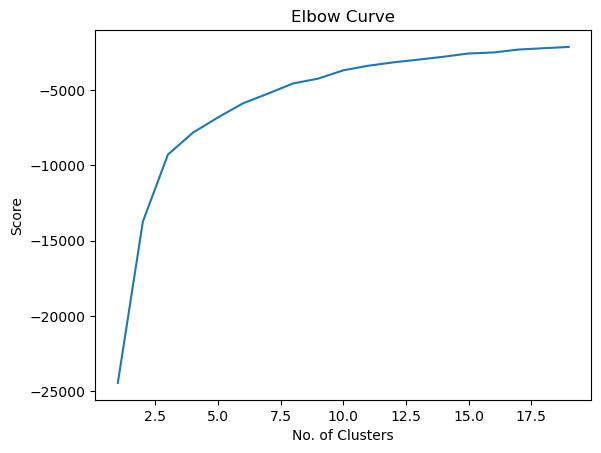

In [31]:
pl.plot(cluster,score)
pl.xlabel('No. of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

so a steep curve until about 3, then tapers off and becomes mostly flat by 10. let's split the difference and do 6 clusters. 

In [32]:
#first we create the k means object
kmeans = KMeans(n_clusters = 6)

In [33]:
kmeans.fit(df_stand)

KMeans(n_clusters=6)

In [34]:
df_stand['clusters'] = kmeans.fit_predict(df_stand)

In [35]:
df_stand.head()

Violent crime total  Murder/NNMS      Rape   Robbery  Aggravated assault  \
0            -0.123538    -0.249085 -0.299531 -0.110538           -0.093860   
1             0.100253     0.934554  0.137047 -0.133052            0.160934   
2             0.122632     0.342735 -0.163101  0.069577            0.177920   
3             0.296069     0.342735 -0.190387  0.058320            0.449700   
4             0.284880     0.737281 -0.326817 -0.099281            0.504905   

   Property crime total  Burglary  Larceny/theft  Motor vehicle theft  \
0              0.023984  0.333500      -0.045668             0.055160   
1             -0.122189 -0.148512      -0.113564            -0.115723   
2              0.818903  1.673211       0.628912             0.729698   
3              0.537506  0.780071       0.475598             0.495858   
4              0.204100  0.191732       0.198904             0.208055   

   LAWTOTAL  Population  Violent crime rate  clusters  
0 -0.704566    0.039651           -0.471636         4  
1 -0.704566    0.087110           -0.127237         4  
2 -0.704566    0.272863           -0.294698         4  
3 -0.704566    0.950412           -0.436361         4  
4 -0.704566    0.334824           -0.170452         4

In [37]:
df_stand['clusters'].value_counts()

4    1681
5     226
0      99
2      25
1       5
3       1
Name: clusters, dtype: int64

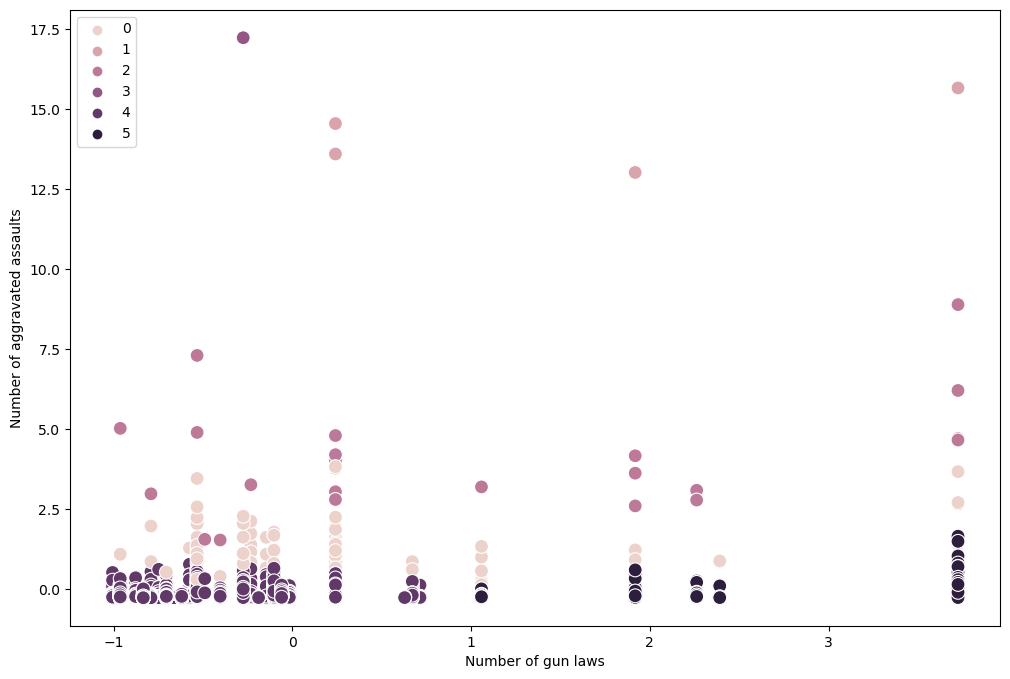

In [38]:
#let's visualize some shit
#I'm thinking gun law total and aggravated assault rate. Maybe people would be more or less likely to attack others even without the intent to kill if they knew there was a possibility the other person has a CC
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['LAWTOTAL'], y=df_stand['Aggravated assault'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Number of gun laws')
plt.ylabel('Number of aggravated assaults')
plt.show()

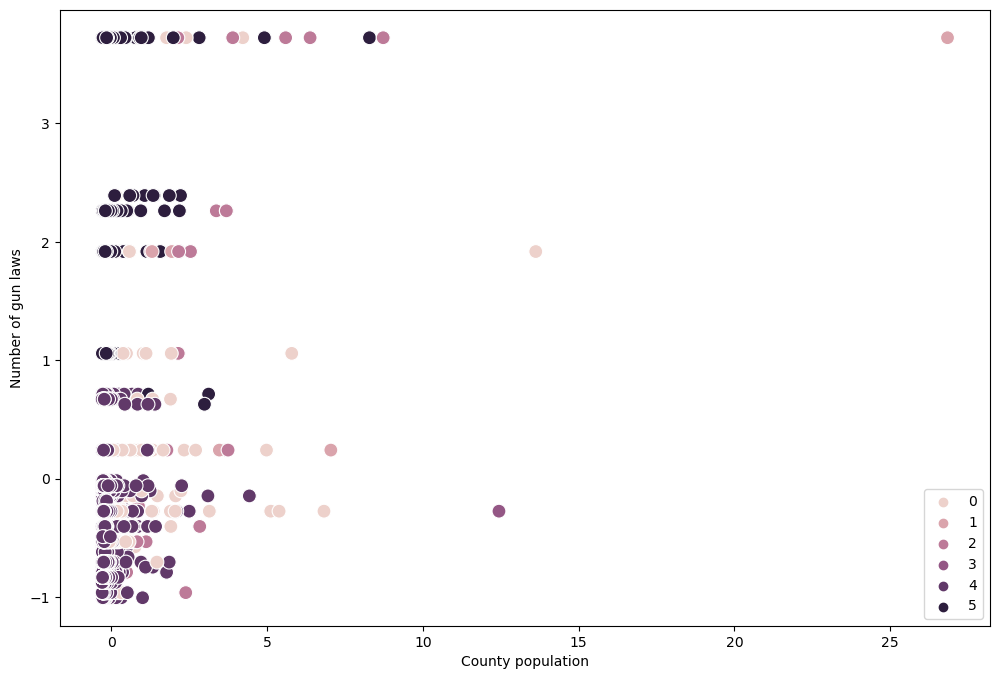

In [39]:
#not much to see here. Let's try again
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Population'], y=df_stand['LAWTOTAL'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('County population')
plt.ylabel('Number of gun laws')
plt.show()

It seems like we have a lot of low population counties and the clusters are defined by how many laws are in the state. Higher population counties are more likely to have more gun laws, but counties aren't actually the ones who make the gun laws. Since most of the US is rural, what we've found so far makes sense, but I think it's leading us to a lot of dead ends in this analysis. We might have to go on another data hunt, maybe things like number of firearms owned per county, and we may want to compare a few states with varying levels of strictness and complete data re: crime and firearms owned. 

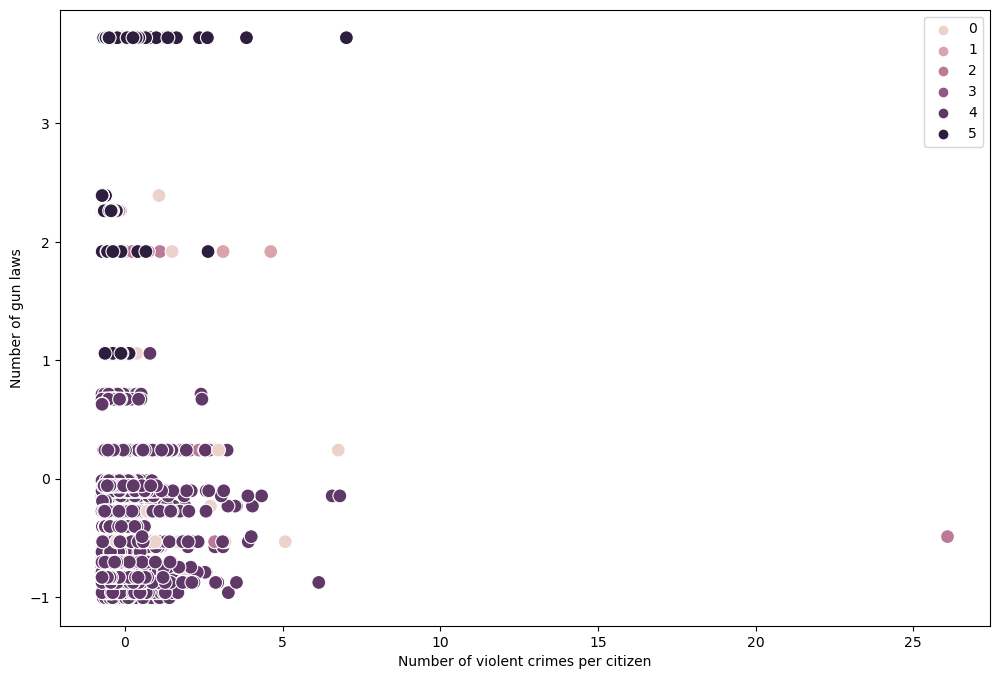

In [46]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_stand['Violent crime rate'], y=df_stand['LAWTOTAL'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Number of violent crimes per citizen')
plt.ylabel('Number of gun laws')
plt.show()

In [49]:
#we'll finish up with our descriptive stats for now
df.loc[df_stand['clusters'] == 5, 'clusters'] = 'midnight purple'
df.loc[df_stand['clusters'] == 4, 'clusters'] = 'dark purple'
df.loc[df_stand['clusters'] == 3, 'clusters'] = 'purple'
df.loc[df_stand['clusters'] == 2, 'clusters'] = 'pink'
df.loc[df_stand['clusters'] == 1, 'clusters'] = 'rose'
df.loc[df_stand['clusters'] == 0, 'clusters'] = 'peach'

In [50]:
df_stand.groupby('clusters').agg({'Violent crime total':['mean', 'median'], 
                         'Property crime total':['mean', 'median'], 
                         'LAWTOTAL':['mean', 'median'],
                         'Population':['mean', 'median'],
                         'Violent crime rate':['mean', 'median']})

Violent crime total            Property crime total             \
                        mean     median                 mean     median   
clusters                                                                  
0                   1.012821   0.989821             1.110547   0.940440   
1                  13.858905  13.379433            11.578882  10.817249   
2                   3.967468   3.806786             4.314946   4.149678   
3                  20.247010  20.247010            23.014761  23.014761   
4                  -0.161791  -0.210257            -0.166037  -0.218543   
5                  -0.075339  -0.179486            -0.086807  -0.182684   

          LAWTOTAL           Population            Violent crime rate  \
              mean    median       mean     median               mean   
clusters                                                                
0         0.220496  0.241342   1.137655   0.563783           0.495904   
1         1.608609  1.918179   8.118477   3.466572           1.924475   
2         1.108138  0.241342   2.504710   2.145929           1.736409   
3        -0.274608 -0.274608  12.442252  12.442252           0.323371   
4        -0.337400 -0.274608  -0.159138  -0.241623          -0.035030   
5         2.256058  1.918179   0.173590  -0.152564          -0.192769   

                    
            median  
clusters            
0         0.179927  
1         1.630437  
2         0.509498  
3         0.323371  
4        -0.271225  
5        -0.414698

I think we're gonna have to get some data that will work better for an analysis honestly. We're dealing with a mostly rural nation where the states, rather than the counties, dictate the laws. We've found some good things here and there thus far, but I'm thinking going forward, we should take a couple of states and compare their numbers over the last few years. Maybe the strictest gun law state, the least restrictive, and one that's right at the national average. You could compare crimes and firearm ownership across counties, crime rate as gun ownership changes or when certain laws passed (constitutional carry for example), and maybe if the data is avaialable accidental firearm deaths or suicides by firearm. It's a lot of work to be done but I'm getting tired of doing these tasks and always having to write "nope can't find much correlation here".